# PRIYANKA PRAKASH KATARIYA | BL.EN.U4AIE21107

# LAB ASSIGNMENT-5 | 7th march 2024 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

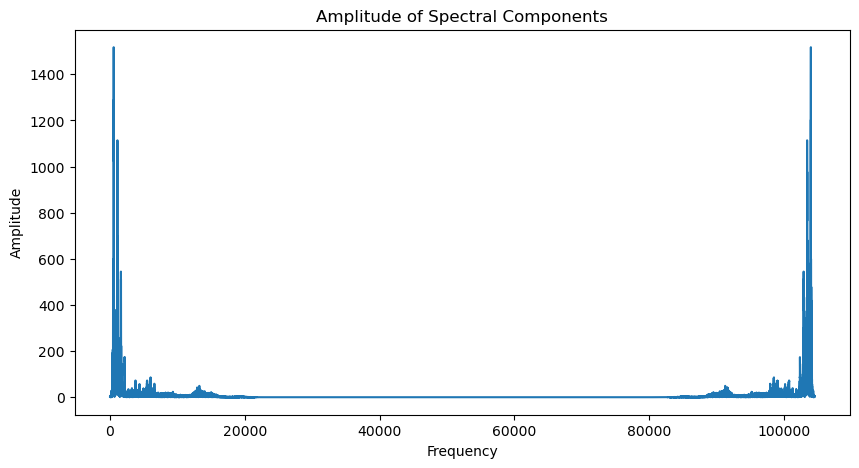

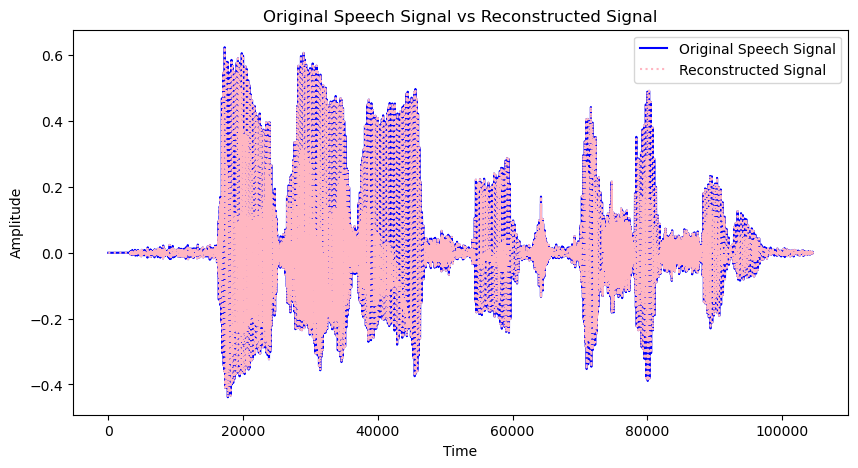

In [11]:

audio_file = "/Users/localadmin/Desktop/VI/AISP/AIinSPaudiofeb1.wav"
speech_signal, sample_rate = librosa.load(audio_file, sr=None)

spectral_domain = np.fft.fft(speech_signal)

plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_domain))
plt.title("Amplitude of Spectral Components")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

time_domain_signal = np.fft.ifft(spectral_domain)

plt.figure(figsize=(10, 5))
plt.plot(speech_signal, label='Original Speech Signal', color='blue')
plt.plot(time_domain_signal.real, label='Reconstructed Signal',linestyle=':', color='lightpink')
plt.title("Original Speech Signal vs Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

In [14]:
#pip install sounddevice

In [15]:
import sounddevice as sd

In [17]:
num_samples = len(speech_signal)
print('the number of samples in the speech signal i.e. the length of the signal is: ',num_samples)

the number of samples in the speech signal i.e. the length of the signal is:  104536


In [20]:
frequency_bins = np.fft.fftfreq(num_samples, 1 / sample_rate)
print(frequency_bins)

[ 0.          0.45917196  0.91834392 ... -1.37751588 -0.91834392
 -0.45917196]


In [30]:
# Rectangular window function-low-pass filter
def lowpass_filter(freq, cutoff_freq):
    return 1.0 * (np.abs(freq) <= cutoff_freq)

# Rectangular window function-band-pass filter
def bandpass_filter(freq, low_cutoff, high_cutoff):
    return 1.0 * ((np.abs(freq) >= low_cutoff) & (np.abs(freq) <= high_cutoff))

# Rectangular window function-high-pass filter
def highpass_filter(freq, cutoff_freq):
    return 1.0 * (np.abs(freq) >= cutoff_freq)

# low-pass filter
cutoff_freq_low = 1000  
filtered_spectral_domain_low = spectral_domain * lowpass_filter(frequency_bins, cutoff_freq_low)

filtered_time_domain_signal_low = np.fft.ifft(filtered_spectral_domain_low)

# low pass audio
sd.play(filtered_time_domain_signal_low.real, sample_rate)
sd.wait()


low_cutoff_band = 2000  
high_cutoff_band = 15000  
filtered_spectral_domain_band = spectral_domain * bandpass_filter(frequency_bins, low_cutoff_band, high_cutoff_band)

filtered_time_domain_signal_band = np.fft.ifft(filtered_spectral_domain_band)

#band pass audio
sd.play(filtered_time_domain_signal_band.real, sample_rate)
sd.wait()

cutoff_freq_high =4000  
filtered_spectral_domain_high = spectral_domain * highpass_filter(frequency_bins, cutoff_freq_high)

filtered_time_domain_signal_high = np.fft.ifft(filtered_spectral_domain_high)

#high pass audio
sd.play(filtered_time_domain_signal_high.real, sample_rate)
sd.wait()


A3. Cosine window

In [31]:
# Cosine window function for low-pass filter
def cosine_lowpass(freq, cutoff_freq):
    return 0.5 * (1 + np.cos(np.pi * freq / cutoff_freq)) * (np.abs(freq) <= cutoff_freq)

# Cosine window function for band-pass filter
def cosine_bandpass(freq, low_cutoff, high_cutoff):
    return cosine_lowpass(freq, high_cutoff) - cosine_lowpass(freq, low_cutoff)

# Cosine window function for high-pass filter
def cosine_highpass(freq, cutoff_freq):
    return 1 - cosine_lowpass(freq, cutoff_freq)

filtered_spectral_domain_low = spectral_domain * cosine_lowpass(frequency_bins, cutoff_freq_low)

filtered_time_domain_signal_low = np.fft.ifft(filtered_spectral_domain_low)

sd.play(filtered_time_domain_signal_low.real, sample_rate)
sd.wait()

filtered_spectral_domain_band = spectral_domain * cosine_bandpass(frequency_bins, low_cutoff_band, high_cutoff_band)
filtered_time_domain_signal_band = np.fft.ifft(filtered_spectral_domain_band)

sd.play(filtered_time_domain_signal_band.real, sample_rate)
sd.wait()

filtered_spectral_domain_high = spectral_domain * cosine_highpass(frequency_bins, cutoff_freq_high)

filtered_time_domain_signal_high = np.fft.ifft(filtered_spectral_domain_high)

sd.play(filtered_time_domain_signal_high.real, sample_rate)
sd.wait()

A4. Gaussian Window

In [33]:
# Gaussian window function for low-pass filter
def gaussian_lowpass(freq, cutoff_freq):
    return np.exp(-(np.pi * freq / cutoff_freq)**2)

# Gaussian window function for band-pass filter
def gaussian_bandpass(freq, low_cutoff, high_cutoff):
    return gaussian_lowpass(freq, high_cutoff) - gaussian_lowpass(freq, low_cutoff)

# Gaussian window function for high-pass filter
def gaussian_highpass(freq, cutoff_freq):
    return 1 - gaussian_lowpass(freq, cutoff_freq)

filtered_spectral_domain_low = spectral_domain * gaussian_lowpass(frequency_bins, cutoff_freq_low)
filtered_time_domain_signal_low = np.fft.ifft(filtered_spectral_domain_low)

sd.play(filtered_time_domain_signal_low.real, sample_rate)
sd.wait()

filtered_spectral_domain_band = spectral_domain * gaussian_bandpass(frequency_bins, low_cutoff_band, high_cutoff_band)
filtered_time_domain_signal_band = np.fft.ifft(filtered_spectral_domain_band)

sd.play(filtered_time_domain_signal_band.real, sample_rate)
sd.wait()

filtered_spectral_domain_high = spectral_domain * gaussian_highpass(frequency_bins, cutoff_freq_high)
filtered_time_domain_signal_high = np.fft.ifft(filtered_spectral_domain_high)
sd.play(filtered_time_domain_signal_high.real, sample_rate)
sd.wait()